# Game screenshot processing

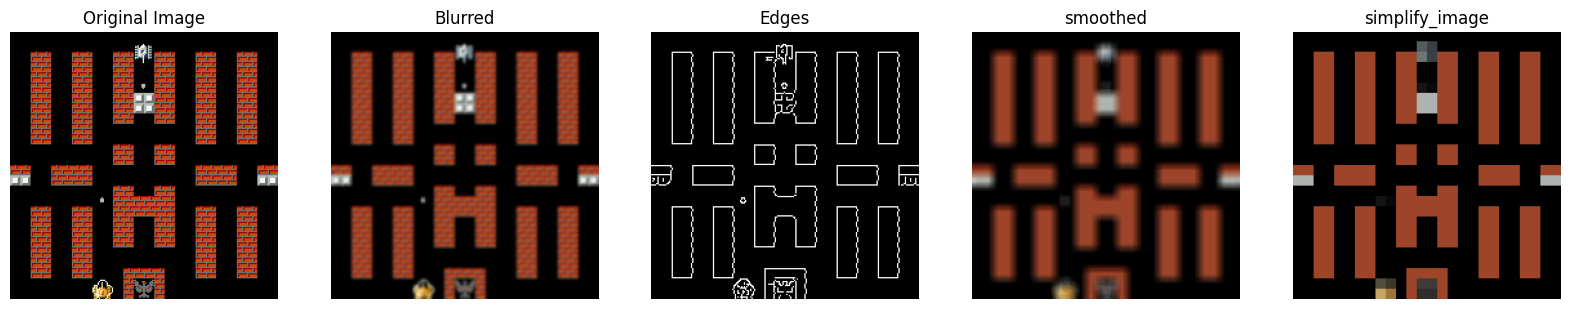

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load an image
image = cv2.imread('../screenshot/32.png')

# Blur the image
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Detect edges
edges = cv2.Canny(blurred, 100, 200)

# -----------------------------------------
# Get image size
height, width, channels = image.shape

# Create a new image with the same size
simplify_image = np.zeros((height, width, channels), np.uint8)

# Set block size
block_size = 8

# Traverse all blocks
for y in range(0, height, block_size):
    for x in range(0, width, block_size):
        #  Get a block
        block = image[y:y+block_size, x:x+block_size]

        # Calculate the average color of the block
        average_color = block.mean(axis=(0, 1))

        # Set the block to the average color
        simplify_image[y:y+block_size, x:x+block_size] = average_color

#--------------------------------
# Create a 8x8 kernel
kernel_size = 8
kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2)
smoothed = cv2.filter2D(image, -1, kernel)


#--------------------------------
# Create a 1x2 subplots
imageList = [image, blurred, edges, smoothed, simplify_image]
titles = ['Original Image', 'Blurred', 'Edges', 'smoothed', 'simplify_image']

# Create a figure
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

# Show the image
for i, ax in enumerate(axes.flat):
    # Convert image to RGB color space
    ax.imshow(cv2.cvtColor(imageList[i], cv2.COLOR_BGR2RGB))
    ax.set_title(titles[i])
    ax.axis('off')

plt.show()
